# Code Flow for Training Data

## Observing the Training Data Pattern through Scatter Plots

### Importing requiered Libraries for Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Importing Data from Folder

In [2]:
data_dir_visualize = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\3D Data\Visualize Data"
bt_folders_visualize = ['Z = + 0 mm', 'Z = + 100 mm', 'Z = + 175 mm', 'Z = + 275 mm', 'Z = + 375 mm', 'Z = + 475 mm']

### Concatenating Data into a Single DataFrame

In [ ]:
all_temp_data = [] # Empty list to hold all temperature data

# Loop over folders
for folder in bt_folders_visualize:
    folder_path = os.path.join(data_dir_visualize, folder)
    
    # Search for temp.csv file inside the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('temp.csv'):
            file_path = os.path.join(folder_path, filename)
            df_visualize = pd.read_csv(file_path)
            df_visualize.columns = ['x', 'y', 'Temperature']
            df_visualize['Z'] = int(folder.split('+')[1].split('mm')[0].strip())  # Creating the B.T. column
            all_temp_data.append(df_visualize)

# Combine all
df_visualize = pd.concat(all_temp_data, ignore_index = True)
df_visualize = df_visualize[['x', 'y', 'Z', 'Temperature']]

In [4]:
df_visualize.shape

(28262, 4)

In [5]:
df_visualize.head(20000)

,x,y,Z,Temperature
0,0.180000,0.020000,0,340.074
1,0.190000,0.020000,0,340.069
2,0.190000,0.030000,0,340.069
3,0.180000,0.030000,0,340.070
4,0.180000,0.010000,0,340.073
...,...,...,...,...
19995,-0.015673,0.210000,375,300.000
19996,-0.021562,0.210000,375,300.000
19997,-0.023889,0.210000,375,300.000
19998,-0.003839,0.202761,375,300.000


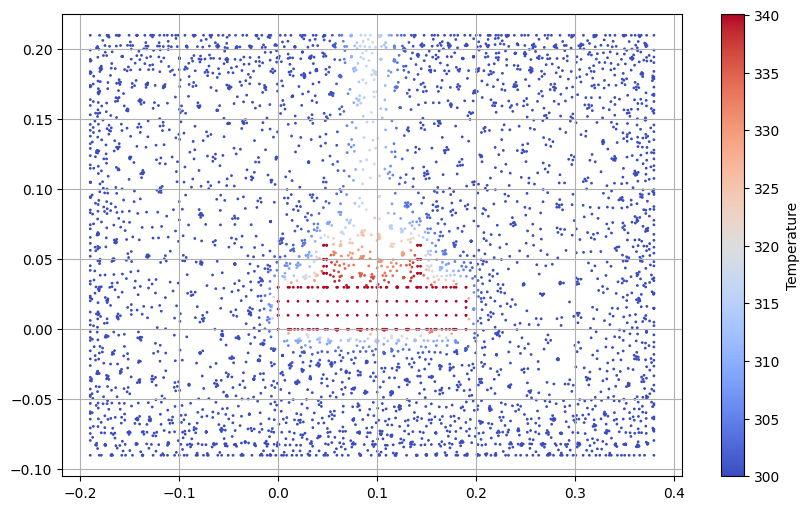

In [6]:
bt_value = 175
df_bt = df_visualize[df_visualize['Z'] == bt_value]

plt.figure(figsize = (10, 6))
plt.scatter(df_bt['x'], df_bt['y'], c = df_bt['Temperature'], cmap = 'coolwarm', s = 1)
plt.colorbar(label = 'Temperature')
plt.grid(True)
plt.show()

### Scatter Plot of all the Body Temperatures with Temperature Variation

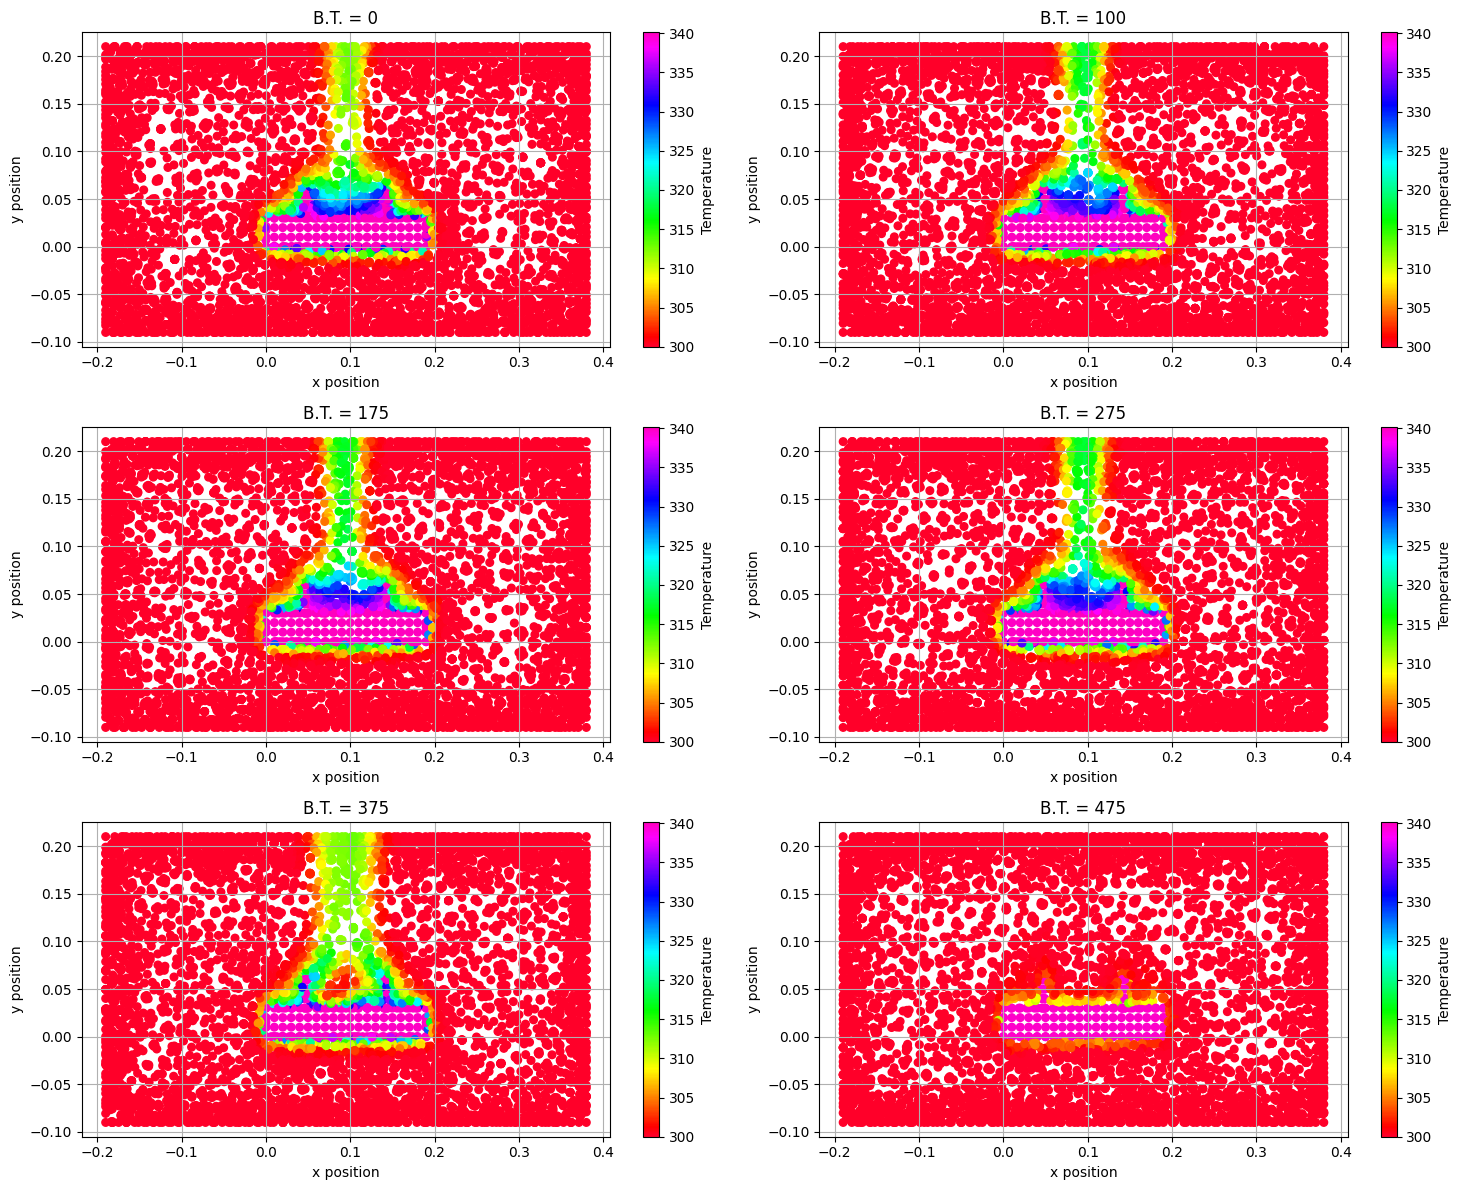

In [7]:
# Get unique boundary conditions sorted
unique_bcs = sorted(df_visualize['Z'].unique())

# Set up subplots
n_cols = 2
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 12))
axes = axes.flatten() # Flatten the 2D array of axes to 1D array

# Loop through B.T.s and plot
for idx, bt_val in enumerate(unique_bcs):
    df_bt = df_visualize[df_visualize['Z'] == bt_val]
    
    ax = axes[idx]
    scatter = ax.scatter(
        df_bt['x'], 
        df_bt['y'], 
        c = df_bt['Temperature'], 
        cmap = 'gist_rainbow', 
        s = 30, 
        vmin = df_visualize['Temperature'].min(), 
        vmax = df_visualize['Temperature'].max()
    )
    ax.set_title(f'B.T. = {bt_val}')
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    ax.grid(True)
    cbar = fig.colorbar(scatter, ax = ax)
    cbar.set_label('Temperature')

plt.tight_layout()
plt.show()